In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [9]:
# import xlsx file

df= pd.read_excel(r"D:\Data Science\HACATHON DOWNLOADS\train_loan_data (1).xlsx")

In [4]:
df.shape

(80000, 28)

In [5]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,1997-07-01,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,1987-04-01,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,2023-08-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,1980-09-01,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,1999-07-01,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   addr_state            80000 non-null  object        
 1   annual_inc            80000 non-null  float64       
 2   earliest_cr_line      80000 non-null  datetime64[ns]
 3   emp_length            75412 non-null  object        
 4   emp_title             74981 non-null  object        
 5   fico_range_high       80000 non-null  int64         
 6   fico_range_low        80000 non-null  int64         
 7   grade                 80000 non-null  object        
 8   home_ownership        80000 non-null  object        
 9   application_type      80000 non-null  object        
 10  initial_list_status   80000 non-null  object        
 11  int_rate              80000 non-null  float64       
 12  loan_amnt             80000 non-null  int64         
 13  num_actv_bc_tl  

In [7]:
#check for null values
pd.isnull(df).sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5019
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    971
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
# change data type
df['annual_inc'] = df['annual_inc'].astype('int')
df['annual_inc'].dtypes

dtype('int32')

In [10]:
# change data type
df['tot_cur_bal'] = df['tot_cur_bal'].astype('int')
df['tot_cur_bal'].dtypes

dtype('int32')

In [11]:
df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [12]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,7.037400e+04,70374.000000,70374.000000,70374.000000,70374.000000,70374.000000,70374.000000,7.037400e+04,70374.000000,70374.000000,70374.000000,7.037400e+04,70374.000000,70374.000000
mean,7.812790e+04,699.144684,695.144514,13.257694,14690.039290,3.647356,1.672294,1.446280e+05,11.790334,0.217822,0.136783,1.662940e+04,52.176967,25.272388
std,7.162197e+04,31.154455,31.153632,4.796973,8755.214826,2.261786,2.000804,1.607180e+05,5.534248,0.584181,0.383933,2.323407e+04,24.298905,12.066398
min,0.000000e+00,664.000000,660.000000,5.310000,1000.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.800000e+04,674.000000,670.000000,9.750000,8000.000000,2.000000,0.000000,3.103200e+04,8.000000,0.000000,0.000000,6.134000e+03,34.000000,16.000000
50%,6.503900e+04,694.000000,690.000000,12.740000,12500.000000,3.000000,1.000000,8.508400e+04,11.000000,0.000000,0.000000,1.131150e+04,52.600000,24.000000
75%,9.243750e+04,714.000000,710.000000,16.020000,20000.000000,5.000000,3.000000,2.152648e+05,15.000000,0.000000,0.000000,1.994300e+04,70.900000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,31.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [13]:
# use describe() for specific columns
df[['annual_inc', 'loan_amnt', 'pub_rec_bankruptcies']].describe()

,annual_inc,loan_amnt,pub_rec_bankruptcies
count,7.037400e+04,70374.000000,70374.000000
mean,7.812790e+04,14690.039290,0.136783
std,7.162197e+04,8755.214826,0.383933
min,0.000000e+00,1000.000000,0.000000
25%,4.800000e+04,8000.000000,0.000000
50%,6.503900e+04,12500.000000,0.000000
75%,9.243750e+04,20000.000000,0.000000
max,7.141778e+06,40000.000000,7.000000


# Exploratory Data Analysis

Application Type

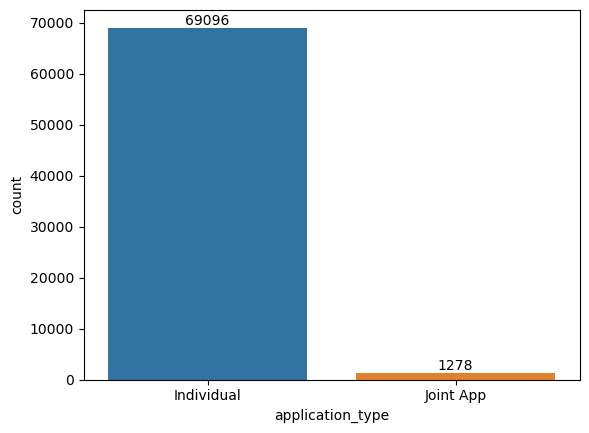

In [14]:
# plotting a bar chart for application_type and it's count

ax = sns.countplot(x = 'application_type',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

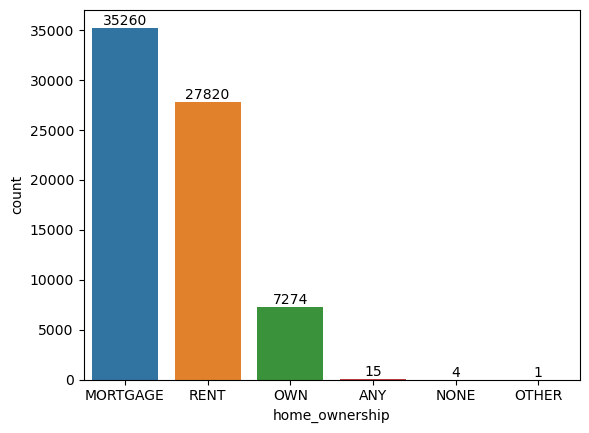

In [15]:
# plotting a bar chart for home_ownership and it's count

ax = sns.countplot(x = 'home_ownership',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='initial_list_status', ylabel='loan_amnt'>

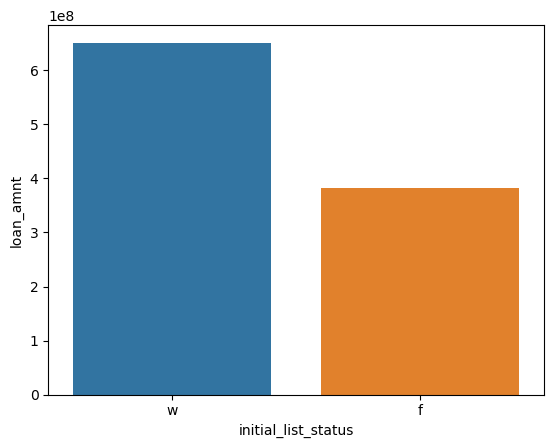

In [22]:
# plotting a bar chart for initial_list_status vs loan_amnt

loan_sanc = df.groupby(['initial_list_status'], as_index=False)['loan_amnt'].sum().sort_values(by='loan_amnt', ascending=False)

sns.barplot(x = 'initial_list_status',y= 'loan_amnt' ,data = loan_sanc)

#  emp_length


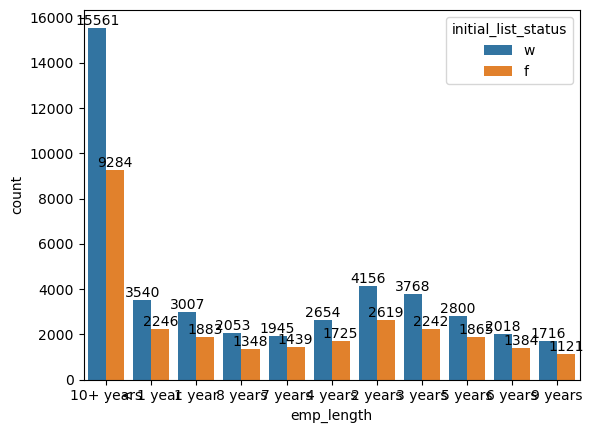

In [23]:
ax = sns.countplot(data = df, x = 'emp_length', hue = 'initial_list_status')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

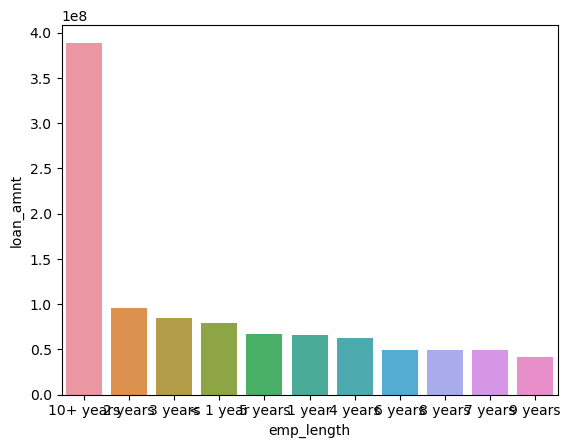

In [24]:
# loan_amnt vs emp_length
loan_period = df.groupby(['emp_length'], as_index=False)['loan_amnt'].sum().sort_values(by='loan_amnt', ascending=False)

sns.barplot(x = 'emp_length',y= 'loan_amnt' ,data = loan_period)

In [4]:
selected_columns = df[['addr_state', 'loan_status']]
print(selected_columns)

      addr_state loan_status
0             CO   Defaulted
1             CA        Paid
2             FL        Paid
3             IL        Paid
4             MD        Paid
...          ...         ...
79995         SC   Defaulted
79996         NH        Paid
79997         NY        Paid
79998         TX        Paid
79999         NY        Paid

[80000 rows x 2 columns]


In [8]:
selected_columns = df[['loan_status']]
loan_status_counts = selected_columns['loan_status'].value_counts()
print(loan_status_counts)

Paid         64030
Defaulted    15970
Name: loan_status, dtype: int64


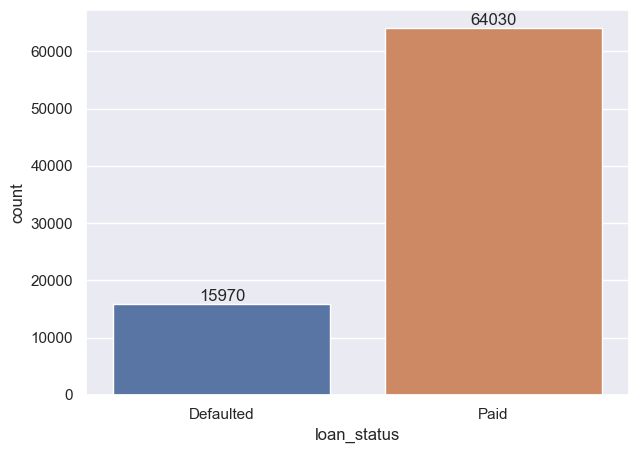

In [9]:
ax = sns.countplot(x = 'loan_status',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [5]:
selected_columns = df[['addr_state']]
print(selected_columns)

      addr_state
0             CO
1             CA
2             FL
3             IL
4             MD
...          ...
79995         SC
79996         NH
79997         NY
79998         TX
79999         NY

[80000 rows x 1 columns]


In [6]:
selected_columns = df[['addr_state']]
state_counts = selected_columns['addr_state'].value_counts()
print(state_counts)

CA    11744
TX     6493
NY     6461
FL     5618
IL     3098
NJ     2853
PA     2676
OH     2575
GA     2530
NC     2291
VA     2249
MI     2091
AZ     1993
MA     1862
MD     1802
CO     1790
WA     1736
MN     1414
IN     1329
MO     1298
NV     1224
TN     1207
CT     1143
WI     1043
OR     1025
SC     1007
AL      986
LA      928
KY      836
OK      725
KS      649
AR      590
UT      554
NM      440
HI      404
NH      373
MS      373
RI      356
WV      268
NE      240
MT      229
DE      219
AK      215
DC      201
SD      192
WY      187
VT      181
ME      110
ID      106
ND       85
IA        1
Name: addr_state, dtype: int64


<Axes: xlabel='addr_state', ylabel='loan_amnt'>

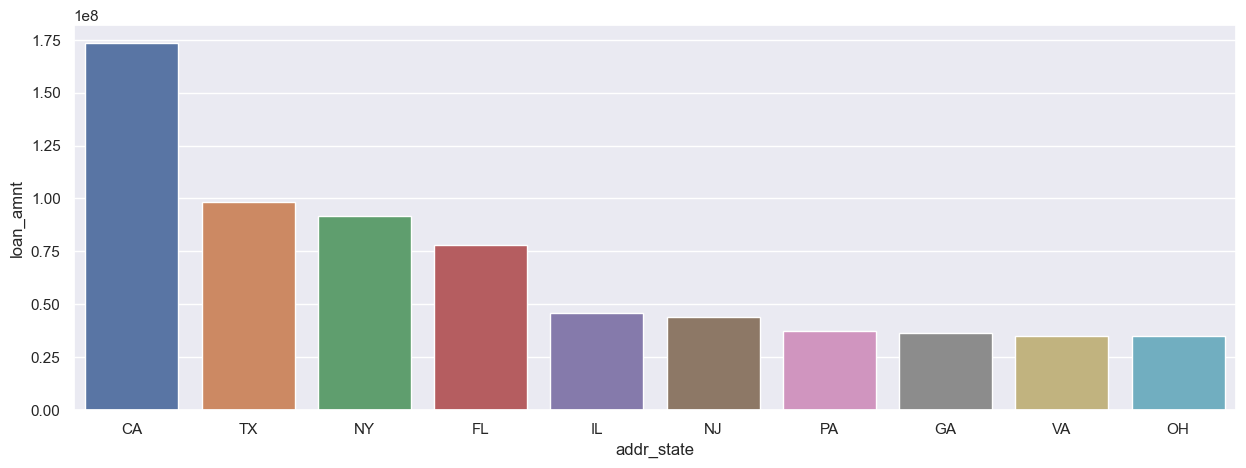

In [7]:
# loan_amnt from top 10 addr_state

loan_state = df.groupby(['addr_state'], as_index=False)['loan_amnt'].sum().sort_values(by='loan_amnt', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = loan_state, x = 'addr_state',y= 'loan_amnt')

In [8]:
selected_columns = df[['emp_title']]
emp_counts = selected_columns['emp_title'].value_counts()
print(emp_counts)

Teacher                    1278
Manager                    1194
Owner                       592
RN                          526
Registered Nurse            517
                           ... 
C&E Auburn V-Twin, Inc.       1
Media manager                 1
MERCHANDISER                  1
DCP Midstream                 1
Sports Group Manager          1
Name: emp_title, Length: 36660, dtype: int64


In [4]:
selected_columns = df[['emp_title', 'loan_status']]
print(selected_columns) 

                            emp_title loan_status
0                              Deputy   Defaulted
1      Department of Veterans Affairs        Paid
2                    Marble polishing        Paid
3                             printer        Paid
4                       Southern Mgmt        Paid
...                               ...         ...
79995            Sports Group Manager   Defaulted
79996                    Web Designer        Paid
79997                 Program Officer        Paid
79998            Sr. Business Analyst        Paid
79999               Managing Director        Paid

[80000 rows x 2 columns]


<Axes: xlabel='emp_title', ylabel='loan_amnt'>

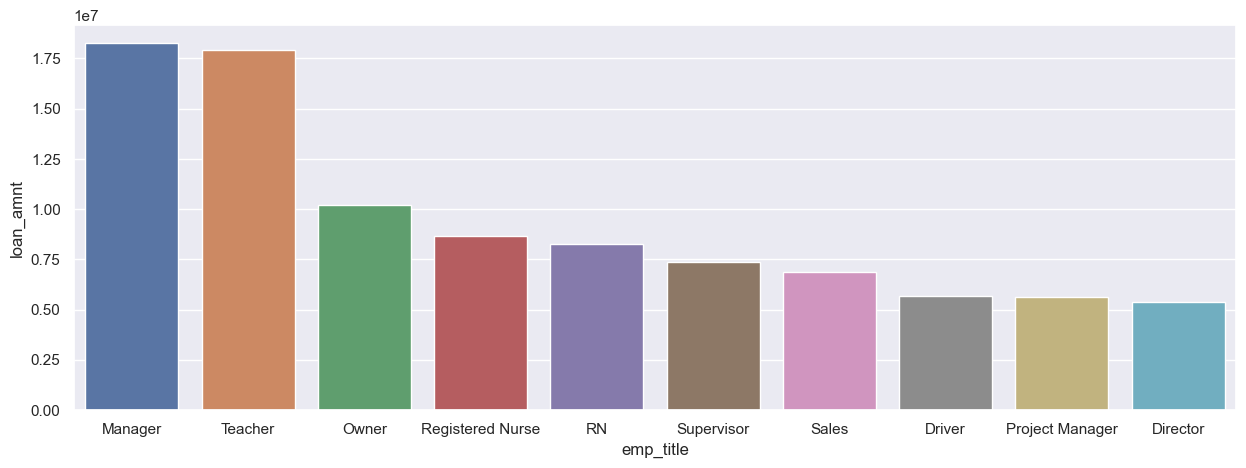

In [7]:
# loan_status from top 10 emp_title

loan_emp = df.groupby(['emp_title'], as_index=False)['loan_amnt'].sum().sort_values(by='loan_amnt', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = loan_emp, x = 'emp_title',y= 'loan_amnt')

Here we withdraw the message that manager and teacher took the highest loan amount.

<Axes: xlabel='addr_state', ylabel='revol_bal'>

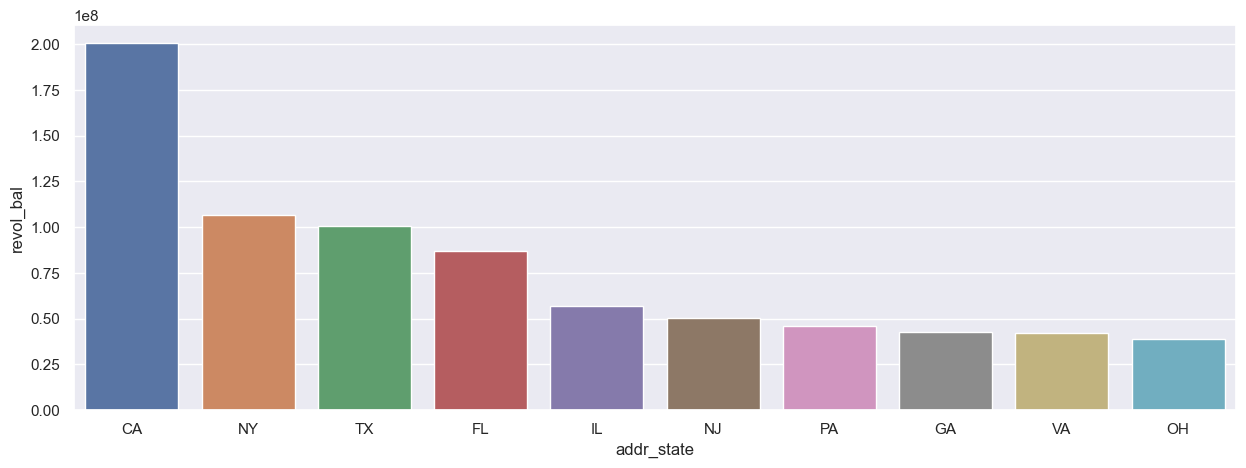

In [5]:
# revol_bal from top 10 addr_state

revol_bal_state = df.groupby(['addr_state'], as_index=False)['revol_bal'].sum().sort_values(by='revol_bal', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = revol_bal_state, x = 'addr_state',y= 'revol_bal')

In [ ]:
addr_state CA has most of the revol_bal.

# Verification_Status


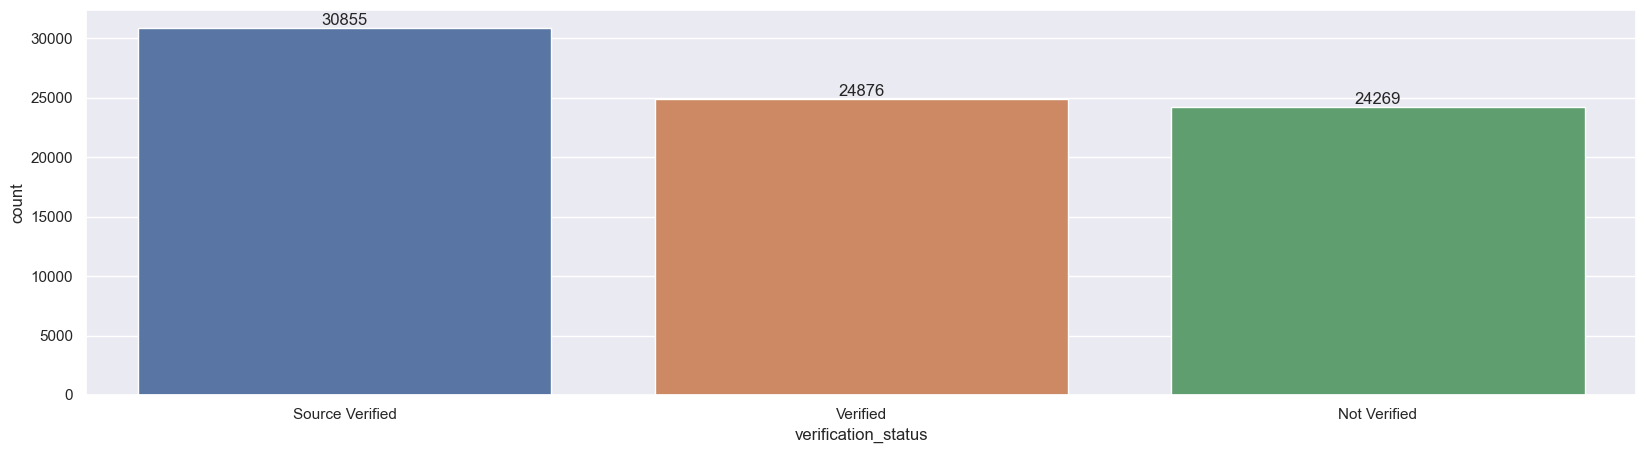

In [5]:
ax = sns.countplot(data = df, x = 'verification_status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

from above category we see most of them are from the Source Verified.

# purpose

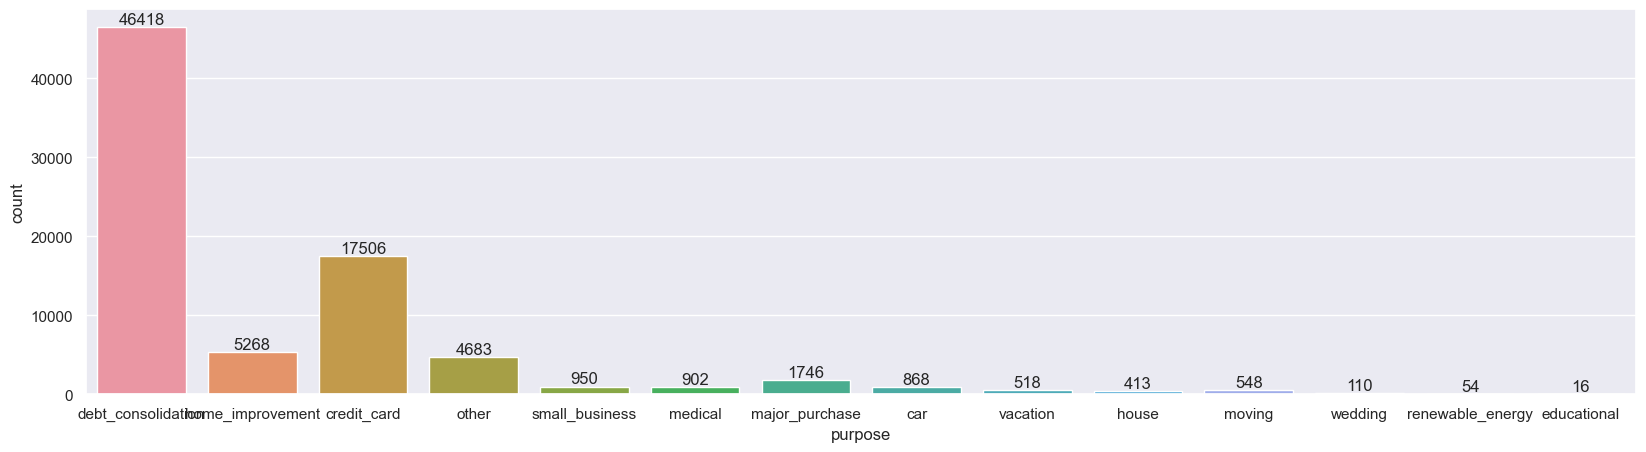

In [3]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'purpose')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='purpose', ylabel='loan_amnt'>

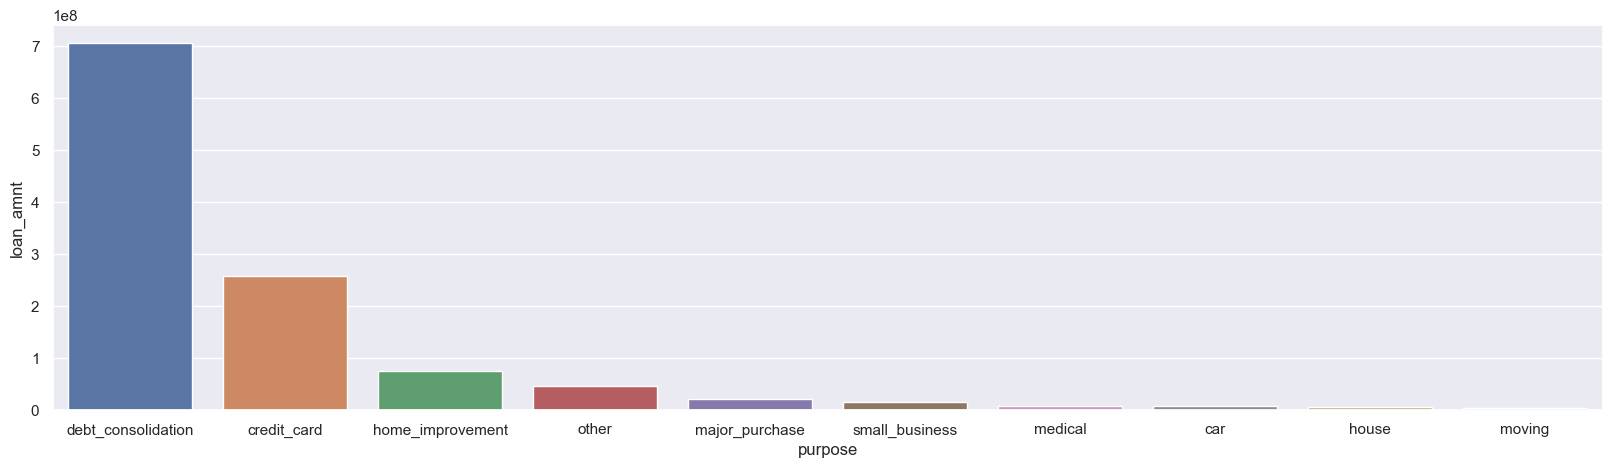

In [4]:
purpose_loan_amnt = df.groupby(['purpose'], as_index=False)['loan_amnt'].sum().sort_values(by='loan_amnt', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = purpose_loan_amnt, x = 'purpose',y= 'loan_amnt')

from the above category we can see that most laon_amnt is sanctioned throught debt_consolidation & credit card.

# Overall we see that "individual" who live in the "mortgage" with initial list status" w"  have "paid" the loans who are "source verified" for the purpose "debt_consolidation".

In [11]:
df['loan_amnt_to_annual_inc_ratio'] = df['loan_amnt'] / df['annual_inc']
print(df['loan_amnt_to_annual_inc_ratio'])

0        0.212647
1        0.220000
2        0.300000
3        0.198527
4        0.437500
           ...   
79995    0.319136
79996    0.155000
79997    0.077778
79998    0.191489
79999    0.018182
Name: loan_amnt_to_annual_inc_ratio, Length: 80000, dtype: float64


In [14]:
loan_purpose_dummies = pd.get_dummies(df['purpose'], prefix='purpose')
df = pd.concat([df, loan_purpose_dummies], axis=1)
print(pd.concat([df, loan_purpose_dummies], axis=1))

      addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0       1997-07-01  10+ years   
1             CA     40000.0       1987-04-01  10+ years   
2             FL     60000.0       2023-08-07  10+ years   
3             IL    100742.0       1980-09-01  10+ years   
4             MD     80000.0       1999-07-01  10+ years   
...          ...         ...              ...        ...   
79995         SC     81000.0       2000-02-01  10+ years   
79996         NH     45000.0       1995-08-01  10+ years   
79997         NY     90000.0       2023-04-05   < 1 year   
79998         TX     94000.0       1992-04-01    3 years   
79999         NY   1100000.0       1999-06-01    2 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy              744             740     E   
1      Department of Veterans Affairs              724             720     B   
2                    Marble polishing  

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['loan_amnt_to_annual_inc_ratio']]

,loan_amnt_to_annual_inc_ratio
0,0.212647
1,0.220000
2,0.300000
3,0.198527
4,0.437500
...,...
79995,0.319136
79996,0.155000
79997,0.077778
79998,0.191489


This train_loan_data project by Sandeep Rai is available on https://github.com/sdrsonu/train_loan_data_by_Sandeep_Rai
for more details just click on the above link.